In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from operator import add

In [5]:
url = 'https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit01-ml-intro/1.6-perceptron-in-python/perceptron_toydata-truncated.txt'
df = pd.read_csv(url, sep='\t')

In [7]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


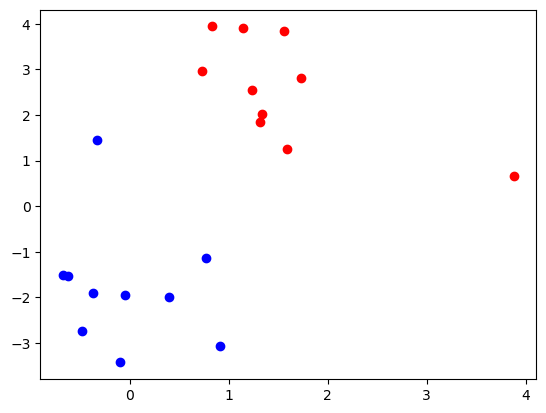

In [12]:
plt.scatter(df[df.label==0].x1, df[df.label==0].x2, c='blue')
plt.scatter(df[df.label==1].x1, df[df.label==1].x2, c='red')

In [29]:
class Perpeptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [.0 for _ in range(num_features)]
        self.bias = .0

    def forward(self, x):
        weighted_sum_z = np.dot(x, self.weights) + self.bias
        prediction = 1 if weighted_sum_z > .0 else 0
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction
        self.bias = error
        self.weights = list(map(add, self.weights, np.dot(error, x)))
        return error

In [39]:
ppn = Perpeptron(num_features=2)

x = [1.1, 2.1]
ppn.update(x,  1)

print("w: ", ppn.weights)
print("b: ", ppn.bias)

w:  [1.1, 2.1]
b:  1


In [40]:
def train(model, X, y, epoch):
    for e in epoch:
        error_count = 0
        for x, y_ in zip(X, y):
            error = model.update(x,y_)
            error_count += abs(error)

        print(f"Epoch {e+1} errors {error_count}")

In [42]:
X_train = df.sample(15)

In [46]:
df[~df.isin(X_train)]

,x1,x2,label
0,0.77,-1.14,0.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,-0.10,-3.43,0.0
9,NaN,NaN,NaN


In [ ]:
ppn = Perpeptron(num_features=2)

train(model=ppn, X=)